In [55]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

print(tf.__version__)

2.10.0


In [56]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [57]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [58]:
train_images.shape

(60000, 28, 28)

In [59]:
train_labels.shape

(60000,)

In [60]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

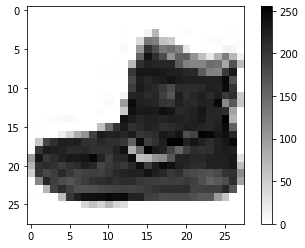

In [61]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [62]:
train_images = train_images / 255.0

test_images = test_images / 255.0

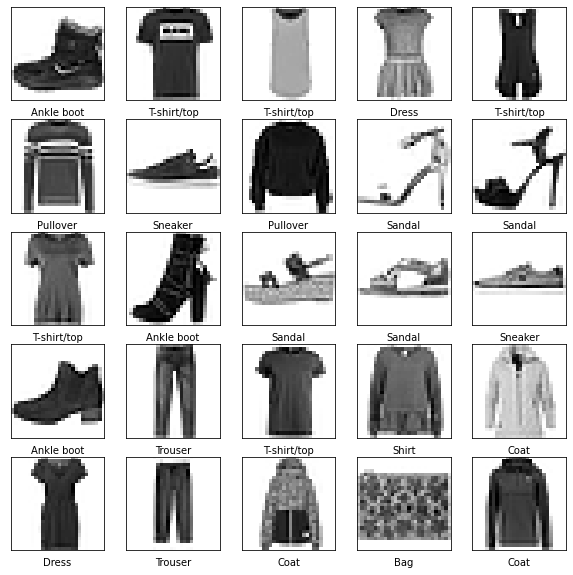

In [63]:
plt.figure(figsize =(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4997 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3746 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3388 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3137 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2954 - accuracy: 0.8911


In [67]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=10)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8752999901771545


In [68]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [69]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 974us/step


In [70]:
predictions[10]

array([2.3708277e-05, 3.0495203e-05, 8.7158807e-02, 2.7206399e-06,
       8.8436764e-01, 1.8007499e-09, 2.8416026e-02, 5.3670499e-09,
       5.5076356e-07, 5.2919333e-08], dtype=float32)

In [71]:
np.argmax(predictions[10])

4

In [72]:
test_labels[10]

4

In [73]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

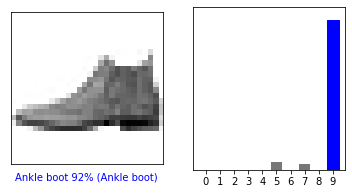

In [74]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

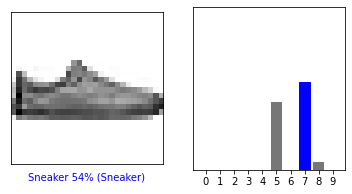

In [75]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

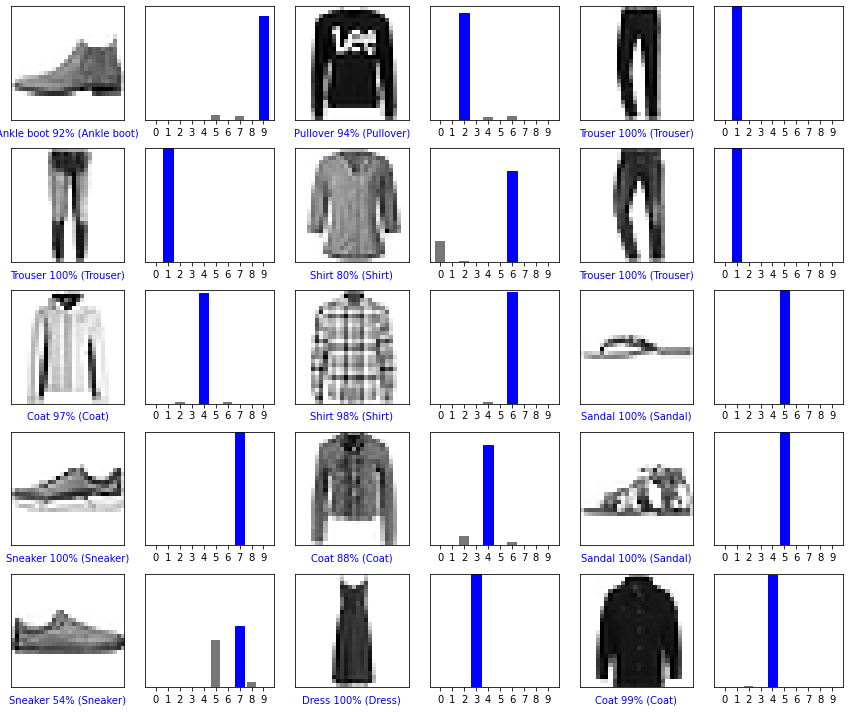

In [76]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [77]:
img = test_images[1]

print(img.shape)

(28, 28)


In [78]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [79]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.53971196e-04 2.50823149e-08 9.44682717e-01 6.28020871e-07
  2.32925639e-02 5.40437432e-13 3.18700150e-02 1.05656376e-13
  5.54572459e-08 7.08012598e-12]]


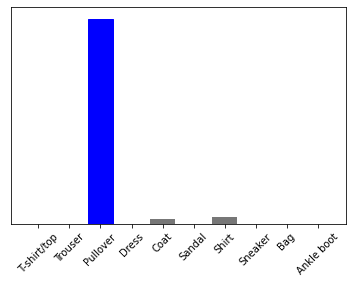

In [80]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [81]:
np.argmax(predictions_single[0])

2